In [1]:
# Import our dependencies
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
retail_df = pd.read_excel("Online Retail - Cleaned.xlsx")
RFM_df = pd.read_csv("RFM.csv")

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538407 entries, 0 to 538406
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    538407 non-null  object        
 1   StockCode    538407 non-null  object        
 2   Description  538407 non-null  object        
 3   Quantity     538407 non-null  int64         
 4   InvoiceDate  538407 non-null  datetime64[ns]
 5   UnitPrice    538407 non-null  float64       
 6   CustomerID   406243 non-null  float64       
 7   Country      538407 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.9+ MB


In [5]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4339 non-null   int64  
 1   Frequency              4339 non-null   int64  
 2   MonetaryValue          4339 non-null   float64
 3   UnitPrice              4339 non-null   float64
 4   Quantity               4339 non-null   float64
 5   Recency                4339 non-null   int64  
 6   RecencyScore           4339 non-null   int64  
 7   FrequencyScore         4339 non-null   int64  
 8   MonetaryScore          4339 non-null   int64  
 9   RFM_Score              4339 non-null   int64  
 10  Value Segment          4339 non-null   object 
 11  RFM Customer Segments  4339 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 406.9+ KB


In [4]:
# Droping rows having missing values

retail_df = retail_df.dropna()
retail_df.shape

(406243, 8)

In [5]:
# Drop rows with "POST" in the StockCode column
retail_df = retail_df[retail_df['StockCode'] != 'POST']
retail_df['StockCode'] = retail_df['StockCode'].astype(str)

# Drop rows where InvoiceNo column starts with "C"
retail_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.startswith('C')]

In [6]:
# Convert the Customer ID field to remove the 0s
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df['CustomerID'] = retail_df['CustomerID'].astype(str)

# Convert 'InvoiceDate' column to datetime data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Verify the data types of the DataFrame
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396493 entries, 0 to 538406
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396493 non-null  object        
 1   StockCode    396493 non-null  object        
 2   Description  396493 non-null  object        
 3   Quantity     396493 non-null  int64         
 4   InvoiceDate  396493 non-null  datetime64[ns]
 5   UnitPrice    396493 non-null  float64       
 6   CustomerID   396493 non-null  object        
 7   Country      396493 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


In [9]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [7]:
#add new column Total Price
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [8]:
# Convert 'InvoiceDate' column to datetime format if it's not already
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Extract month and week from 'InvoiceDate' and create new columns
retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].dt.month
retail_df['InvoiceDay'] = retail_df['InvoiceDate'].dt.day_of_week

# Display the DataFrame with the new invoice columns
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2


In [9]:
# Change the Customer ID field into string to match retail_df
RFM_df['CustomerID'] = RFM_df['CustomerID'].astype(str)

In [10]:
# Merge the two dataframes
RFM_merged_df = pd.merge(retail_df, RFM_df, on=['CustomerID'], how='inner')
RFM_merged_df.head()

,InvoiceNo,StockCode,Description,Quantity_x,InvoiceDate,UnitPrice_x,CustomerID,Country,TotalPrice,InvoiceMonth,...,MonetaryValue,UnitPrice_y,Quantity_y,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,...,5391.21,3.96037,5.835017,373,1,1,1,3,Low-Value,Gone


In [11]:
# Double check the shape and columns of merged dataframe
print(RFM_merged_df.shape)
print(RFM_merged_df.columns)

(396493, 22)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity_x', 'InvoiceDate',
       'UnitPrice_x', 'CustomerID', 'Country', 'TotalPrice', 'InvoiceMonth',
       'InvoiceDay', 'Frequency', 'MonetaryValue', 'UnitPrice_y', 'Quantity_y',
       'Recency', 'RecencyScore', 'FrequencyScore', 'MonetaryScore',
       'RFM_Score', 'Value Segment', 'RFM Customer Segments'],
      dtype='object')


In [22]:
# Narrow down the dataframe for feature engineering
customer_evaluation_df = RFM_merged_df[['StockCode', 'Quantity_x', 'UnitPrice_x', 'TotalPrice', 'CustomerID', 'Country',
                              'InvoiceMonth', 'InvoiceDay', 'RFM_Score']]
customer_evaluation_df.head()

,StockCode,Quantity_x,UnitPrice_x,TotalPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,RFM_Score
0,85123A,6,2.55,15.30,17850,United Kingdom,12,2,3
1,71053,6,3.39,20.34,17850,United Kingdom,12,2,3
2,84406B,8,2.75,22.00,17850,United Kingdom,12,2,3
3,84029G,6,3.39,20.34,17850,United Kingdom,12,2,3
4,84029E,6,3.39,20.34,17850,United Kingdom,12,2,3


In [24]:
# drop mid and high values
customer_evaluation_df.drop(customer_evaluation_df.loc[customer_evaluation_df['RFM_Score'] > 4].index, inplace=True)

# Transform the Value Segment column to binary where 0 is Low-value while 1 is Mid- to High-value
customer_evaluation_df.loc[ customer_evaluation_df['RFM_Score'] == 3, 'RFM_Score'] = 'Gone'
customer_evaluation_df.loc[ customer_evaluation_df['RFM_Score'] == 4, 'RFM_Score'] = 'At Risk'


customer_evaluation_df.sample(5)

,StockCode,Quantity_x,UnitPrice_x,TotalPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,RFM_Score
45188,21621,2,8.50,17.0,12971,United Kingdom,12,1,Gone
256029,21932,2,1.65,3.3,14730,United Kingdom,10,2,At Risk
76310,21390,6,1.25,7.5,13174,United Kingdom,1,3,Gone
79556,20728,4,1.65,6.6,15039,United Kingdom,6,1,Gone
155549,84755,16,0.65,10.4,16316,United Kingdom,5,1,Gone


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
customer_evaluation_df['Country'] = encoder.fit_transform(customer_evaluation_df['Country'])
customer_evaluation_df['StockCode'] = encoder.fit_transform(customer_evaluation_df['StockCode'])
customer_evaluation_df['CustomerID'] = encoder.fit_transform(customer_evaluation_df['CustomerID'])
customer_evaluation_df.head()

,StockCode,Quantity_x,UnitPrice_x,TotalPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,RFM_Score
0,3199,6,2.55,15.30,2247,32,12,2,Gone
1,2625,6,3.39,20.34,2247,32,12,2,Gone
2,2820,8,2.75,22.00,2247,32,12,2,Gone
3,2771,6,3.39,20.34,2247,32,12,2,Gone
4,2770,6,3.39,20.34,2247,32,12,2,Gone


In [27]:
# Split target column from dataset
y = customer_evaluation_df['RFM_Score'].values.reshape(-1, 1)
X = customer_evaluation_df.drop(columns='RFM_Score')

In [28]:
# Preview the feature data
X.head()

,StockCode,Quantity_x,UnitPrice_x,TotalPrice,CustomerID,Country,InvoiceMonth,InvoiceDay
0,3199,6,2.55,15.30,2247,32,12,2
1,2625,6,3.39,20.34,2247,32,12,2
2,2820,8,2.75,22.00,2247,32,12,2
3,2771,6,3.39,20.34,2247,32,12,2
4,2770,6,3.39,20.34,2247,32,12,2


In [29]:
# Preview the target data
y[:5]

array([['Gone'],
       ['Gone'],
       ['Gone'],
       ['Gone'],
       ['Gone']], dtype=object)

In [30]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")

X_train shape = (204591, 8)
X_test shape = (68198, 8)


# KNeighbors Classifier Model

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to sample from
param_dist = {'n_neighbors': randint(1, 10), 'weights': ['uniform', 'distance']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5)

# Fit the RandomizedSearchCV object to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'n_neighbors': 1, 'weights': 'uniform'}


In [33]:
# Create and fit a KNN model
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')  # Define the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", knn_accuracy)
print(classification_report(knn_predictions,y_test))

Accuracy: 0.85841227015455
              precision    recall  f1-score   support

     At Risk       0.75      0.76      0.76     19735
        Gone       0.90      0.90      0.90     48463

    accuracy                           0.86     68198
   macro avg       0.83      0.83      0.83     68198
weighted avg       0.86      0.86      0.86     68198



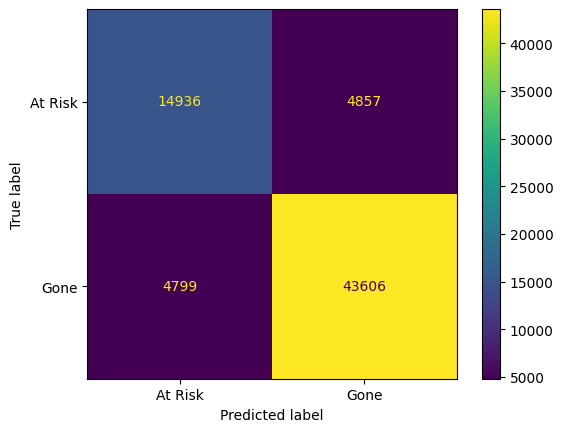

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.savefig("at_risk_vs_gone.png")
plt.show()